In [112]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(0)

In [113]:
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [114]:
x_train = np.asarray(x_train, dtype = np.float32)
y_train = np.asarray(y_train, dtype = np.float32)

print(x_train.shape, y_train.shape)

# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
nb_classes = x_train.shape[1]

(8, 3) (8, 3)


In [115]:
W = tf.Variable(tf.random.normal([3, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]
print(W, b)

<tf.Variable 'weight:0' shape=(3, 3) dtype=float32, numpy=
array([[ 1.5110626 ,  0.42292204, -0.41969493],
       [-1.0360372 , -1.2368279 ,  0.47027302],
       [-0.01397489,  1.1888583 ,  0.60253334]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 1.0668802 ,  0.19454929, -0.53082895], dtype=float32)>


In [116]:
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)


def cost_fn(X, Y):
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(hypothesis(X)), axis=1))

def grad(X, Y):
    with tf.GradientTape() as tape:
        loss_value = cost_fn(X, Y)
        return tape.gradient(loss_value, [W, b])

def accuracy_fn(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    is_correct = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy




In [129]:
epoch = []
cost = []
acc = []
def fit(X, Y, epochs=1000, verbose=50, learning_rate=0.05):
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    
    for i in range(epochs):
        grads = grad(X, Y)
        optimizer.apply_gradients(zip(grads, [W, b]))
        epoch.append(i)
        cost.append(cost_fn(X,Y).numpy())
        acc.append(accuracy_fn(X,Y).numpy())
        if (i == 0) | ((i+1) % verbose == 0):
            print('epoch: {}, cost: {:.4f}, accuracy: {:.4f}'.format(i+1, cost_fn(X, Y).numpy(), accuracy_fn(X, Y)))

In [130]:
fit(x_train, y_train)

epoch: 1, cost: 0.8118, accuracy: 0.5000
epoch: 50, cost: 0.7513, accuracy: 0.6250
epoch: 100, cost: 0.7062, accuracy: 0.6250
epoch: 150, cost: 0.6716, accuracy: 0.6250
epoch: 200, cost: 0.6440, accuracy: 0.6250
epoch: 250, cost: 0.6210, accuracy: 0.7500
epoch: 300, cost: 0.6013, accuracy: 0.7500
epoch: 350, cost: 0.5841, accuracy: 0.7500
epoch: 400, cost: 0.5688, accuracy: 0.7500
epoch: 450, cost: 0.5550, accuracy: 0.8750
epoch: 500, cost: 0.5425, accuracy: 0.8750
epoch: 550, cost: 0.5309, accuracy: 0.8750
epoch: 600, cost: 0.5202, accuracy: 0.8750
epoch: 650, cost: 0.5102, accuracy: 0.8750
epoch: 700, cost: 0.5008, accuracy: 0.8750
epoch: 750, cost: 0.4920, accuracy: 1.0000
epoch: 800, cost: 0.4837, accuracy: 1.0000
epoch: 850, cost: 0.4758, accuracy: 1.0000
epoch: 900, cost: 0.4683, accuracy: 1.0000
epoch: 950, cost: 0.4611, accuracy: 1.0000
epoch: 1000, cost: 0.4543, accuracy: 1.0000


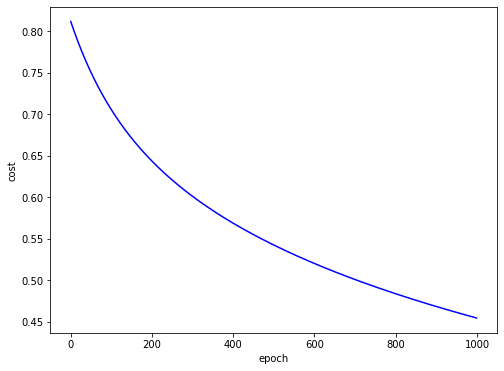

In [131]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(epoch, cost, "b")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

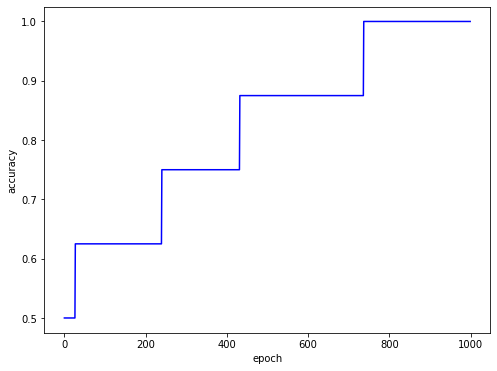

In [132]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(epoch, acc, "b")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [139]:
#test
x_test = np.asarray(x_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.float32)
pre = hypothesis(x_test)
acc_test = accuracy_fn(x_test, y_test)

print("Prediction_test : {} | Accuracy_test : {:.2f}".format(pre.numpy() ,acc_test))

Prediction_test : [[4.7751873e-06 1.6993145e-03 9.9829596e-01]
 [2.6698072e-07 4.3460052e-04 9.9956506e-01]
 [1.7681919e-05 6.0981186e-03 9.9388415e-01]] | Accuracy_test : 1.00
